#### Importing libraries

In [1]:
import pandas as pd
import numpy as np
import statsmodels
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import GridSearchCV,KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

#### Retrieving the dataset .

In [2]:
data = pd.read_csv('train.csv')
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Performing basic checks on the dataset.

In [3]:
data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


#### Checking the number of rows and columns present in the dataset

In [4]:
data.shape

(1460, 81)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Treating Null values
    Checking for the percentage of null values present in the dataset and arranging them in descending order.

In [6]:
percent_missing=data.isnull().sum()/len(data.index)
round(percent_missing,2).sort_values(ascending=False).head(19)

PoolQC          1.00
MiscFeature     0.96
Alley           0.94
Fence           0.81
FireplaceQu     0.47
LotFrontage     0.18
GarageYrBlt     0.06
GarageFinish    0.06
GarageType      0.06
GarageQual      0.06
GarageCond      0.06
BsmtExposure    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtFinType2    0.03
BsmtFinType1    0.03
MasVnrType      0.01
MasVnrArea      0.01
Id              0.00
dtype: float64

#### Considering 10% as the threshold for treating the null values
    Deleting the features that has more than 10% of null values.
    Deleting ID column as it wont contribute in our model building

In [7]:
data = data.drop(['PoolQC','MiscFeature','Alley','Fence','FireplaceQu','LotFrontage','Id'],axis=1)

#### Verifying whether the columns are deleted.

In [8]:
data.shape

(1460, 74)

#### Checking for the remaining features having missing values.

In [9]:
percent_missing=data.isnull().sum()/len(data.index)
round(percent_missing,2).sort_values(ascending=False).head(19)

GarageType      0.06
GarageYrBlt     0.06
GarageFinish    0.06
GarageQual      0.06
GarageCond      0.06
BsmtFinType1    0.03
BsmtQual        0.03
BsmtCond        0.03
BsmtExposure    0.03
BsmtFinType2    0.03
MasVnrType      0.01
MasVnrArea      0.01
KitchenAbvGr    0.00
BedroomAbvGr    0.00
HalfBath        0.00
FullBath        0.00
BsmtHalfBath    0.00
KitchenQual     0.00
TotRmsAbvGrd    0.00
dtype: float64

#### Treating the missing values of the remaining columns with appropriate values.

In [10]:
data['GarageYrBlt'] = data['GarageYrBlt'].fillna(0)

#### If the garage column has NA that means the place does not have garage thus replacing all the null values with 'No Garage' and we will do the same for basement.

In [11]:
#null value treatment for Garage
data.GarageType = data.GarageType.fillna('No Garage')
data.GarageFinish = data.GarageFinish.fillna('No Garage')
data.GarageQual = data.GarageQual.fillna('No Garage')
data.GarageCond = data.GarageCond.fillna('No Garage')

In [12]:
#null value treatment for basement 
data.BsmtFinType1 = data.BsmtFinType1.fillna('No Basement')
data.BsmtFinType2 = data.BsmtFinType2.fillna('No Basement')
data.BsmtQual = data.BsmtQual.fillna('No Basement')
data.BsmtCond = data.BsmtCond.fillna('No Basement')
data.BsmtExposure = data.BsmtExposure.fillna('No Basement')

In [13]:
data[{'MasVnrType','MasVnrArea'}].value_counts()

MasVnrType  MasVnrArea
None        0.0           859
BrkFace     180.0           7
            120.0           7
            16.0            6
            108.0           6
                         ... 
            262.0           1
            261.0           1
            260.0           1
            259.0           1
Stone       860.0           1
Length: 401, dtype: int64

#### As MasVnrType and MasVnrArea have very less amount of null values so we will replace them with the highest amount of value present in them i.e. we have 859 values containing None and 0.0 for MasVnrType and MasVnrArea  respectively. Thus replacing NA with none and 0.0 respectively

In [14]:
data['MasVnrType'] = data['MasVnrType'].fillna('None')
data['MasVnrArea'] = data['MasVnrArea'].fillna(0)

In [15]:
data.isnull().sum()

MSSubClass       0
MSZoning         0
LotArea          0
Street           0
LotShape         0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 74, dtype: int64

#### As we can see all the null values have been treated.

In [16]:
data.columns

Index(['MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual',
       'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath',
       'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr',
       'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorc

In [17]:
data.head(20)

,MSSubClass,MSZoning,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,...,0,0,0,0,0,12,2008,WD,Normal,250000
5,50,RL,14115,Pave,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,...,0,320,0,0,700,10,2009,WD,Normal,143000
6,20,RL,10084,Pave,Reg,Lvl,AllPub,Inside,Gtl,Somerst,...,0,0,0,0,0,8,2007,WD,Normal,307000
7,60,RL,10382,Pave,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,...,228,0,0,0,350,11,2009,WD,Normal,200000
8,50,RM,6120,Pave,Reg,Lvl,AllPub,Inside,Gtl,OldTown,...,205,0,0,0,0,4,2008,WD,Abnorml,129900
9,190,RL,7420,Pave,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,...,0,0,0,0,0,1,2008,WD,Normal,118000


#### Finding features which has same value for the major part of the dataset and dropping them as they wont contribute much to our model.

In [18]:
data.Street.value_counts()

Pave    1454
Grvl       6
Name: Street, dtype: int64

In [19]:
data.Utilities.value_counts()

AllPub    1459
NoSeWa       1
Name: Utilities, dtype: int64

In [20]:
data['3SsnPorch'].value_counts()

0      1436
168       3
144       2
180       2
216       2
290       1
153       1
96        1
23        1
162       1
182       1
196       1
320       1
245       1
238       1
508       1
140       1
130       1
407       1
304       1
Name: 3SsnPorch, dtype: int64

In [21]:
data['MiscVal'].value_counts()

0        1408
400        11
500         8
700         5
450         4
600         4
2000        4
1200        2
480         2
15500       1
800         1
350         1
3500        1
1300        1
54          1
620         1
560         1
1400        1
8300        1
1150        1
2500        1
Name: MiscVal, dtype: int64

In [22]:
data['PoolArea'].value_counts()

0      1453
512       1
648       1
576       1
555       1
480       1
519       1
738       1
Name: PoolArea, dtype: int64

#### As we can see, the major part of dataset in above features has single value. Thus dropping these features.

In [23]:
data = data.drop(['PoolArea','MiscVal','3SsnPorch','Utilities','Street'],axis=1)

In [24]:
data.shape

(1460, 69)

#### Plotting heatmap to check the correlation between varables

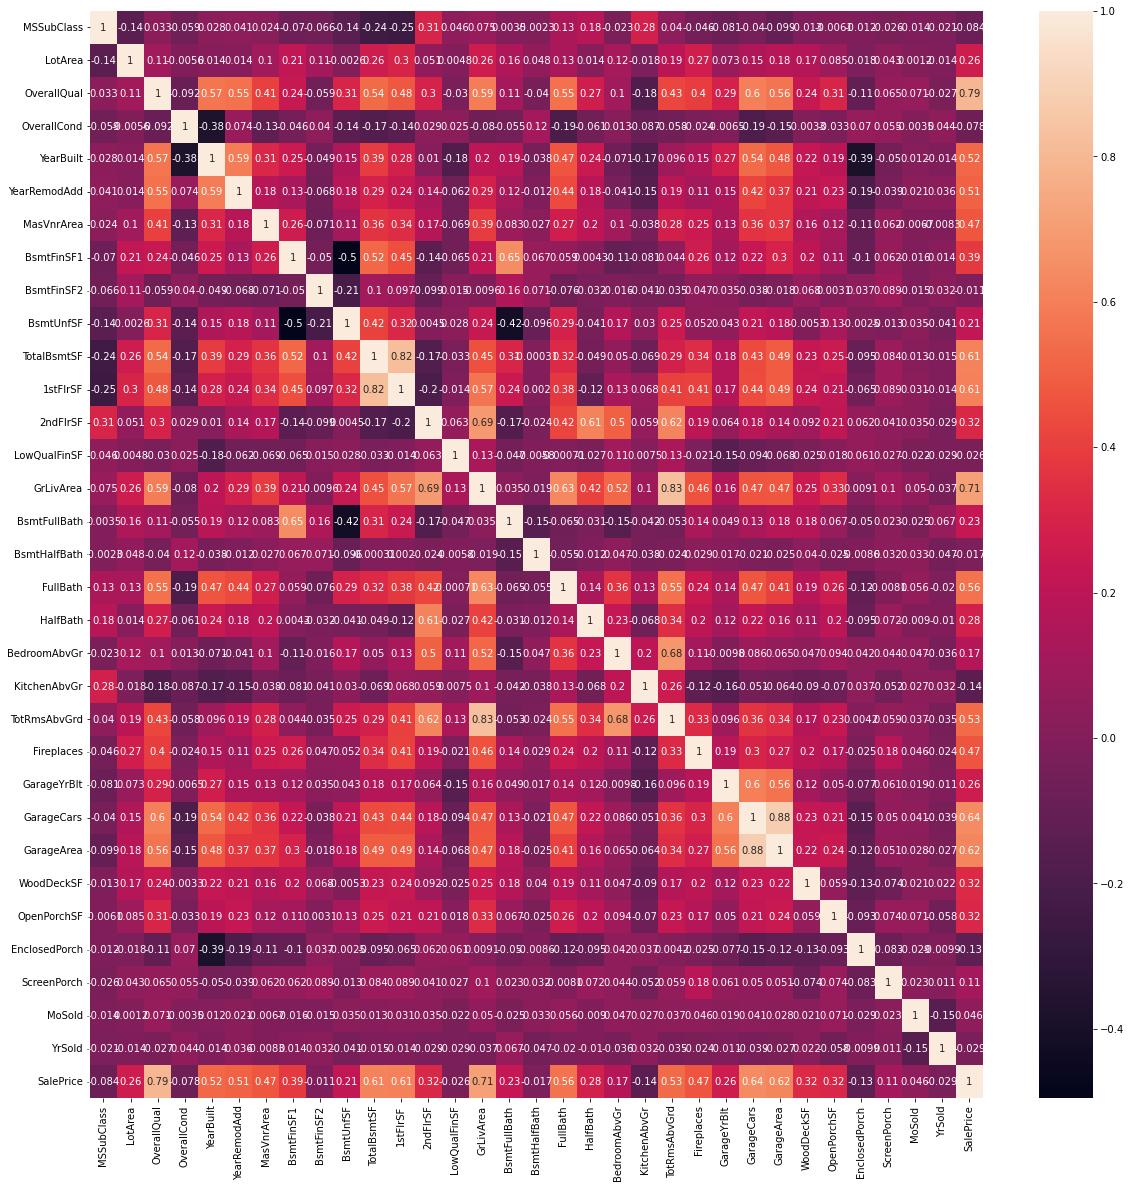

In [25]:
plt.figure(figsize=(20,20))
sns.heatmap(data[list(data.dtypes[data.dtypes!='object'].index)].corr(),annot=True)
plt.show()

#### From the above correlation plot, we can clearly see that our target variable (SalePrice) has highest positive correlation with OverallQual. This means that the SalePrice directly depends on the overall Quality of the house i.e. if the overall quality of house is good then its price will also be higher.

#### Outlier Treatment:
    The below function will treat all the outliers present in the dataset.

In [26]:
num = list(data.dtypes[data.dtypes !='object'].index) #selecting all the numeric features in num
#function for removing outliers
def drop_outliers(x):
    list = []
    for col in num:
        Q1 = x[col].quantile(.25) #Taking lower quartile as 25%
        Q3 = x[col].quantile(.99) #Taking upper quartile as 99%
        IQR = Q3-Q1
        x =  x[(x[col] >= (Q1-(1.5*IQR))) & (x[col] <= (Q3+(1.5*IQR)))] 
    return x   

data = drop_outliers(data)

#### Dealing with categorical features:
        There are some features which are categorical in nature. So we will convert them into numeric datatypes.

In [27]:
# Viewing features that has object data type
data[list(data.dtypes[data.dtypes=='object'].index)].head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,Y,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal


In [28]:
#Converting Binary varible into numeric datatypes
# mapping it to 0 and 1
data['CentralAir'] = data['CentralAir'].apply(lambda x : 1 if x == 'Y' else 0)
data['PavedDrive'] = data['PavedDrive'].apply(lambda x : 1 if x == 'Y' else 0)

In [29]:
cat_values = data.select_dtypes(include=['object']) #Retrieving all the categorical features having object datatypes into cat_values
cat_values.head()

,MSZoning,LotShape,LandContour,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,...,HeatingQC,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,SaleType,SaleCondition
0,RL,Reg,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal
1,RL,Reg,Lvl,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,...,Ex,SBrkr,TA,Typ,Attchd,RFn,TA,TA,WD,Normal
2,RL,IR1,Lvl,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,...,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal
3,RL,IR1,Lvl,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,...,Gd,SBrkr,Gd,Typ,Detchd,Unf,TA,TA,WD,Abnorml
4,RL,IR1,Lvl,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,...,Ex,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,WD,Normal


In [30]:
# convert into dummies
dummy = pd.get_dummies(cat_values, drop_first=True)
dummy.head()

,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotShape_IR2,LotShape_IR3,LotShape_Reg,LandContour_HLS,LandContour_Low,LandContour_Lvl,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
1,0,0,1,0,0,0,1,0,0,1,...,0,0,0,0,1,0,0,0,1,0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0
3,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,1,0


In [31]:
# Droping the original categorical column
data = data.drop(list(cat_values.columns), axis=1)

In [32]:
data.shape

(1374, 35)

In [33]:
# Adding the dummy categorical column to original dataset
data = pd.concat([data, dummy], axis=1)

In [34]:
data.shape

(1374, 228)

In [35]:
data.head(5)

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,8450,7,5,2003,2003,196.0,706,0,150,...,0,0,0,0,1,0,0,0,1,0
1,20,9600,6,8,1976,1976,0.0,978,0,284,...,0,0,0,0,1,0,0,0,1,0
2,60,11250,7,5,2001,2002,162.0,486,0,434,...,0,0,0,0,1,0,0,0,1,0
3,70,9550,7,5,1915,1970,0.0,216,0,540,...,0,0,0,0,1,0,0,0,0,0
4,60,14260,8,5,2000,2000,350.0,655,0,490,...,0,0,0,0,1,0,0,0,1,0


#### Plotting the distribution and qqplot to check the skewness of the dataset.

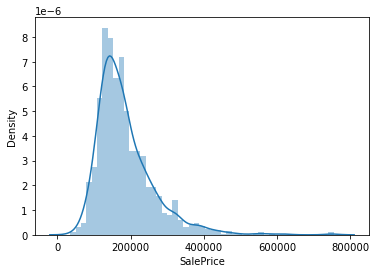

In [36]:
plt.figure()
sns.distplot(data['SalePrice'])
plt.show()

In [37]:
print("Skewness: %f" % data['SalePrice'].skew())

Skewness: 1.950242


#### We can see little right skewness in the distribution

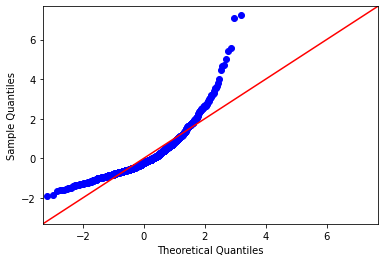

In [38]:
sm.qqplot(data['SalePrice'],stats.t,distargs=(4,), fit=True, line="45")
plt.show()

#### Performing data transformation on target variable by taking log of SalePrice. This will help us to treat the skewness in the dataset.

In [39]:
data["Log_SalePrice"] = np.log(data["SalePrice"])

In [40]:
saleprice = data[['SalePrice']].copy()
data = data.drop('SalePrice',axis=1)

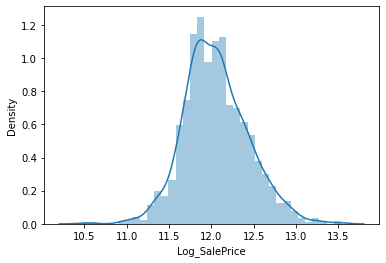

In [41]:
plt.figure()
sns.distplot(data['Log_SalePrice'])
plt.show()

#### After doing log on SalePrice, we can see that we have got the plot close to the normal distribution.

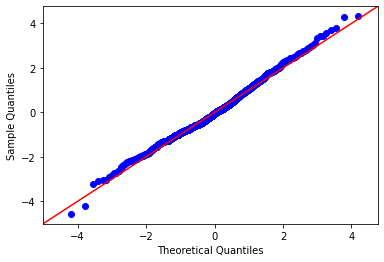

In [42]:
sm.qqplot(data['Log_SalePrice'],stats.t,distargs=(4,), fit=True, line="45")
plt.show()

#### Now as we have treated the skewness of the dataset, lets move further towards splitting the Dataset into train and test.

#### Train Test Split:

In [43]:
df_train,df_test = train_test_split(data, train_size=0.7,test_size = 0.3, random_state=100)

In [44]:
data.columns

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       ...
       'SaleType_ConLw', 'SaleType_New', 'SaleType_Oth', 'SaleType_WD',
       'SaleCondition_AdjLand', 'SaleCondition_Alloca', 'SaleCondition_Family',
       'SaleCondition_Normal', 'SaleCondition_Partial', 'Log_SalePrice'],
      dtype='object', length=228)

In [45]:
y_train = df_train.pop('Log_SalePrice')
X_train = df_train

In [46]:
y_test = df_test.pop('Log_SalePrice')
X_test = df_test

In [47]:
numeric_val=X_train.select_dtypes(include=['int64','float64']).columns
numeric_val

Index(['MSSubClass', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt',
       'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'CentralAir', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', 'ScreenPorch', 'MoSold', 'YrSold'],
      dtype='object')

#### Scaling the data

In [48]:
##   Scaling the data
scaler = MinMaxScaler()
X_train[numeric_val] = scaler.fit_transform(X_train[numeric_val])
X_test[numeric_val] = scaler.transform(X_test[numeric_val])

#### Model Building

In [49]:
## Building a linear Regression model.
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [50]:
#Predictions on the basis of the model
y_pred = reg.predict(X_train)
y_pred

array([12.3618927 , 12.10708618, 12.58265305, 11.90379715, 13.09431458,
       12.03058624, 12.62613678, 12.06855774, 12.31786346, 12.20822144,
       13.06620789, 12.72202301, 12.95583725, 11.87063217, 11.46671295,
       11.69300842, 12.20363617, 12.93067932, 12.46877289, 11.877388  ,
       12.09070587, 12.25035858, 12.22629547, 12.55093002, 12.12387085,
       11.97581482, 12.11322403, 12.51019669, 12.46205521, 11.84233093,
       11.93559265, 11.73070908, 11.79107285, 11.14069366, 11.80013275,
       12.22569656, 12.23330688, 11.50373077, 12.25490189, 11.75383377,
       12.60139847, 11.66109085, 11.73167801, 11.43691635, 12.01968384,
       11.83456802, 11.81983948, 12.04158783, 11.88421631, 12.32770538,
       12.35208511, 11.66777802, 12.73178101, 12.20797729, 11.40397263,
       11.82906342, 11.85669708, 12.18008423, 11.66241837, 11.94575119,
       12.59395599, 11.5249939 , 12.02636337, 12.01554489, 12.39653778,
       12.54582214, 11.55550766, 11.76235199, 12.3536911 , 11.82

#### After doing predictions on the model, lets check the r2_score on the predicted model.

In [51]:
r2_score(y_train,y_pred)

0.9549972648850006

In [52]:
#Residual sum of squares.
rss = np.sum(np.square(y_train - y_pred))
print("RSS:", rss)
mse = mean_squared_error(y_train, y_pred)
print("MSE:", mse)
rmse = mse**0.5
print("RMSE: ", rmse)

RSS: 6.318942229259445
MSE: 0.00657538213242398
RMSE:  0.08108872999636867


In [53]:
# Calculating the RFE
rfe = RFE(reg, 20)
rfe = rfe.fit(X_train, y_train)
col = X_train.columns[rfe.support_]
col

Index(['BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'Condition1_RRNe',
       'Condition2_PosN', 'Exterior2nd_CBlock', 'BsmtQual_No Basement',
       'BsmtCond_No Basement', 'BsmtCond_Po', 'BsmtFinType1_No Basement',
       'Electrical_Mix', 'GarageCond_Fa', 'GarageCond_Gd', 'GarageCond_Po',
       'GarageCond_TA'],
      dtype='object')

In [54]:
X_train_new=X_train[col]
X_train_new = sm.add_constant(X_train_new)

#create first model
lr=sm.OLS(y_train,X_train_new)

#fit the model
lr_model=lr.fit()

#Print the summary 
lr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Log_SalePrice   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.729
Method:                 Least Squares   F-statistic:                     216.6
Date:                Wed, 10 Aug 2022   Prob (F-statistic):          1.01e-261
Time:                        14:16:18   Log-Likelihood:                 194.63
No. Observations:                 961   AIC:                            -363.3
Df Residuals:                     948   BIC:                            -300.0
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
============================================================================================
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                        8.8006      0.031    287.176      0.000       8.740       8.861
BsmtFinSF1                   0.6461      0.040     16.069      0.000       0.567       0.725
BsmtFinSF2                   0.1493      0.048      3.122      0.002       0.055       0.243
BsmtUnfSF                    0.4709      0.042     11.331      0.000       0.389       0.552
TotalBsmtSF                  0.8180      0.057     14.403      0.000       0.707       0.929
1stFlrSF                     0.4093      0.070      5.852      0.000       0.272       0.547
2ndFlrSF                     0.6656      0.033     20.069      0.000       0.600       0.731
LowQualFinSF                -0.1878      0.093     -2.015      0.044      -0.371      -0.005
GrLivArea                    0.5965      0.039     15.416      0.000       0.521       0.672
Condition1_RRNe          -2.938e-17   6.76e-17     -0.434      0.664   -1.62e-16    1.03e-16
Condition2_PosN           2.198e-16   2.67e-17      8.224      0.000    1.67e-16    2.72e-16
Exterior2nd_CBlock          -0.3647      0.199     -1.831      0.067      -0.756       0.026
BsmtQual_No Basement         0.0589      0.018      3.200      0.001       0.023       0.095
BsmtCond_No Basement         0.0589      0.018      3.200      0.001       0.023       0.095
BsmtCond_Po                 -0.1569      0.109     -1.438      0.151      -0.371       0.057
BsmtFinType1_No Basement     0.0589      0.018      3.200      0.001       0.023       0.095
Electrical_Mix              -0.1569      0.109     -1.438      0.151      -0.371       0.057
GarageCond_Fa                2.1031      0.043     49.350      0.000       2.019       2.187
GarageCond_Gd                2.3526      0.069     34.118      0.000       2.217       2.488
GarageCond_Po                1.9984      0.074     27.040      0.000       1.853       2.143
GarageCond_TA                2.3465      0.027     86.683      0.000       2.293       2.400
==============================================================================
Omnibus:                      117.950   Durbin-Watson:                   1.981
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              206.513
Skew:                          -0.788   Prob(JB):                     1.43e-45
Kurtosis:                       4.634   Cond. No.                     1.87e+29
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 6.48e-56. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

#### As we can see the above model is not that satisfactory to do predictions. so in order to improve our model, we will now build the models using Ridge and Lasso regression.

#### Ridge regression:

In [55]:
folds  = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001,0.01,0.1,0.2,0.5,0.9,1.0, 5.0, 10.0,20.0]}

model = Ridge()

model_cv = GridSearchCV(estimator=model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True)

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 0.2, 0.5, 0.9, 1.0, 5.0,
                                   10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [56]:
cv_result_r = pd.DataFrame(model_cv.cv_results_)
cv_result_r['param_alpha'] = cv_result_r['param_alpha'].astype('float32')
cv_result_r.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.046638,0.008737,0.014169,0.004726,0.001,{'alpha': 0.001},0.894661,0.904565,0.926091,0.797783,...,0.955357,0.961443,0.955011,0.957543,0.956801,0.954928,0.956220,0.955690,0.956587,0.001909
1,0.044278,0.005956,0.014140,0.004716,0.010,{'alpha': 0.01},0.894843,0.905059,0.927384,0.798542,...,0.955349,0.961438,0.954983,0.957528,0.956789,0.954922,0.956213,0.955678,0.956576,0.001911
2,0.043755,0.006259,0.014058,0.004686,0.100,{'alpha': 0.1},0.897769,0.906561,0.932689,0.803825,...,0.955039,0.961182,0.954643,0.957139,0.956438,0.954668,0.955935,0.955408,0.956278,0.001913
3,0.046880,0.006989,0.009373,0.007653,0.200,{'alpha': 0.2},0.900263,0.907479,0.934883,0.807012,...,0.954564,0.960774,0.954199,0.956650,0.955970,0.954263,0.955495,0.955055,0.955853,0.001904
4,0.045318,0.004691,0.010935,0.007158,0.500,{'alpha': 0.5},0.903902,0.909489,0.936859,0.811208,...,0.953166,0.959537,0.952894,0.955256,0.954630,0.953006,0.954107,0.953941,0.954576,0.001888


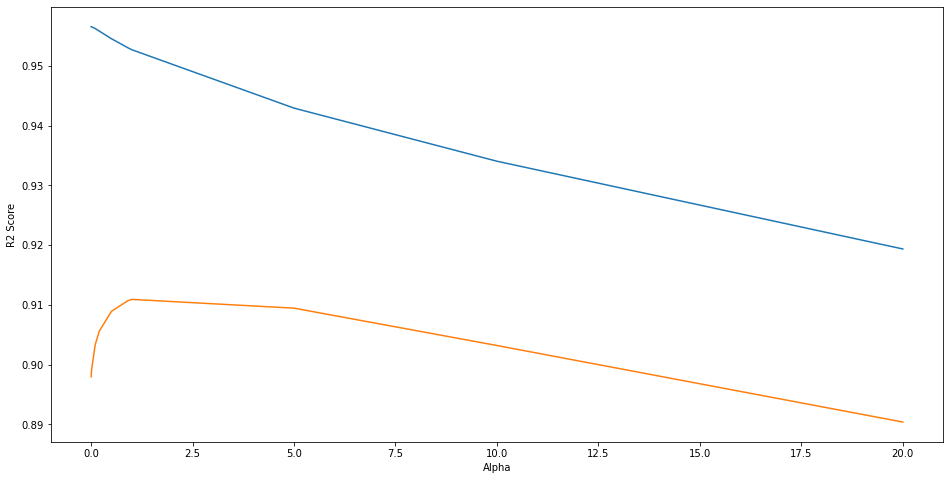

In [57]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_train_score'])
plt.plot(cv_result_r['param_alpha'],cv_result_r['mean_test_score'])
plt.xlabel('Alpha')
# plt.xscale('log')
plt.ylabel('R2 Score')
plt.show()

#### Based on the graph above, we will create our model

In [58]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 1.0}

In [59]:
ridge = Ridge(alpha = 1.0)
ridge.fit(X_train,y_train)

y_pred_train = ridge.predict(X_train)
print(r2_score(y_train,y_pred_train))

y_pred_test = ridge.predict(X_test)
print(r2_score(y_test,y_pred_test))

0.951494613029963
0.8640161933454418


In [60]:
model_parameter = list(ridge.coef_)
model_parameter.insert(0,ridge.intercept_)
cols = df_train.columns
cols.insert(0,'constant')
ridge_coef = pd.DataFrame(list(zip(cols,model_parameter)))
ridge_coef.columns = ['Feaure','Coefficient']
ridge_coef.sort_values(by='Coefficient',ascending=False).head(10)

,Feaure,Coefficient
0,MSSubClass,10.719385
16,BsmtFullBath,0.377362
13,2ndFlrSF,0.350104
3,OverallCond,0.304296
4,YearBuilt,0.264144
14,LowQualFinSF,0.261374
5,YearRemodAdd,0.195360
11,CentralAir,0.190987
220,SaleType_Oth,0.178968
2,OverallQual,0.176067


#### Lasso Regression:

In [61]:
folds = KFold(n_splits=10,shuffle=True,random_state=42)

hyper_param = {'alpha':[0.001, 0.01, 0.1,1.0, 5.0, 10.0,20.0]}

model = Lasso()

model_cv = GridSearchCV(estimator = model,
                        param_grid=hyper_param,
                        scoring='r2',
                        cv=folds,
                        verbose=1,
                        return_train_score=True
                       )

model_cv.fit(X_train,y_train)

Fitting 10 folds for each of 7 candidates, totalling 70 fits


GridSearchCV(cv=KFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Lasso(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1.0, 5.0, 10.0, 20.0]},
             return_train_score=True, scoring='r2', verbose=1)

In [62]:
cv_result_l = pd.DataFrame(model_cv.cv_results_)
cv_result_l['param_alpha'] = cv_result_l['param_alpha'].astype('float32')
cv_result_l.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.123719,0.015402,0.012534,0.006268,0.001,{'alpha': 0.001},0.904886,0.928407,0.926829,0.835823,...,0.932131,0.938210,0.932286,0.933801,0.933541,0.932714,0.930991,0.930900,0.933137,0.002039
1,0.065630,0.009373,0.012494,0.006247,0.010,{'alpha': 0.01},0.771336,0.826053,0.819202,0.705677,...,0.812436,0.825160,0.811392,0.813952,0.814374,0.807029,0.809364,0.811743,0.812149,0.005183
2,0.042188,0.007162,0.009375,0.007654,0.100,{'alpha': 0.1},0.048124,0.090740,0.109767,0.110364,...,0.112748,0.120182,0.098031,0.104638,0.118376,0.104889,0.090716,0.115663,0.109365,0.009056
3,0.039062,0.007815,0.015627,0.000008,1.000,{'alpha': 1.0},-0.036170,-0.022425,-0.002660,-0.023185,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.040625,0.007654,0.009373,0.007653,5.000,{'alpha': 5.0},-0.036170,-0.022425,-0.002660,-0.023185,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


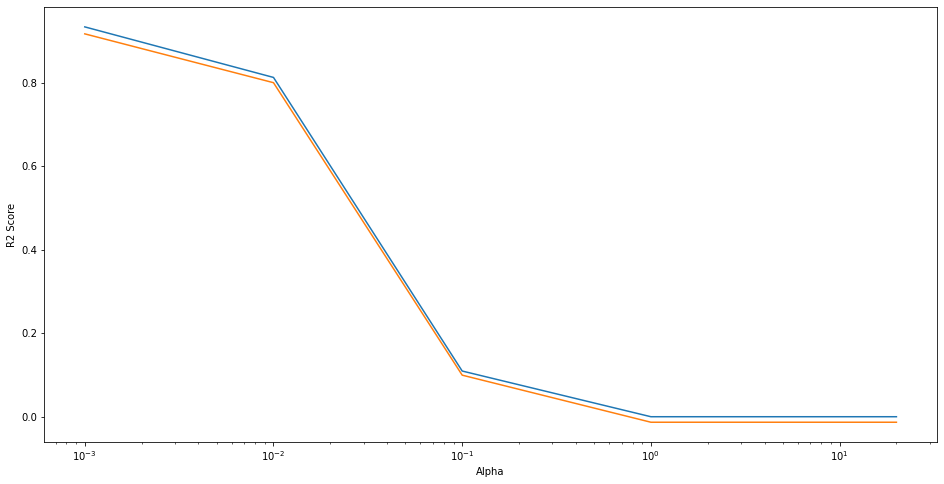

In [63]:
plt.figure(figsize=(16,8))
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_train_score'])
plt.plot(cv_result_l['param_alpha'],cv_result_l['mean_test_score'])
plt.xscale('log')
plt.ylabel('R2 Score')
plt.xlabel('Alpha')
plt.show()

In [64]:
# Checking the best parameter(Alpha value)
model_cv.best_params_

{'alpha': 0.001}

In [65]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9323520569674042
0.8612291009064933


In [66]:
model_param = list(lasso.coef_)
model_param.insert(0,lasso.intercept_)
cols = df_train.columns
cols.insert(0,'const')
lasso_coef = pd.DataFrame(list(zip(cols,model_param)))
lasso_coef.columns = ['Featuere','Coefficient']
lasso_coef.sort_values(by='Coefficient',ascending=False).head(10)

,Featuere,Coefficient
0,MSSubClass,10.805343
16,BsmtFullBath,1.046566
3,OverallCond,0.480733
4,YearBuilt,0.243565
11,CentralAir,0.239781
5,YearRemodAdd,0.156306
26,GarageArea,0.138297
8,BsmtFinSF2,0.129102
220,SaleType_Oth,0.117120
24,GarageYrBlt,0.084519


#### Final model:
    -Comparing the 'R2 score Vs alpha' graphs of ridge and lasso regression, we can clearly see that lasso regression graph 
    has more overlapping of train and test datapoints as compared to ridge regression.
    -Also the model parameter values for columns is better in Lasso as compared to Ridge.
    -Thus, our final prediction model would be Lasso Regression

#### Lasso Regression:

In [67]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train,y_train)

y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

print(r2_score(y_true=y_train,y_pred=y_train_pred))
print(r2_score(y_true=y_test,y_pred=y_test_pred))

0.9323520569674042
0.8612291009064933


#### After compairing both the model we can see that the below Features are best explaining the DataSet
    -MSSubClass	
    -BsmtFullBath
    -OverallCond
    -YearBuilt
    -CentralAir

#### Best alpha value for Lasso : {'alpha': 0.001}
#### Best alpha value for Ridge : {'alpha': 1.0}